## Import Libraries

In [1]:
#Libraries
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import pandas as pd
from keras.layers import Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, Callback
from keras.optimizers import Adam
import keras
import json
from keras.models import load_model
from keras.models import model_from_json
%matplotlib inline

Using TensorFlow backend.


## Mounting Google Colab drive

In [2]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#Change working directory to make it easier to access the files 
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks")
os.getcwd() 

'/content/gdrive/My Drive/Colab Notebooks'

## Extract edges

In [0]:
!pip install Mahotas
os.chdir("/content/gdrive/My Drive/Colab Notebooks/Image-feature-detection-using-Phase-Stretch-Transform/Python")
from os.path import join
import PST_function
from PST_function import PST
import mahotas as mh

In [0]:
os.chdir("/content/gdrive/My Drive/Colab Notebooks/Motion_Net")
#folder with images
image_dir=os.listdir('swim_edge') 
img_path = 'swim_edge/'

#create a list to hold the array of pixels of each image
swim=[]
count=0
#place the pixels for each image in the list
while len(swim)<len(os.listdir('swim_edge')) and count<500:
  for image_name in os.listdir('swim_edge'):
    image_name=image_name.split('.')
    image_name=str(image_name[0])
    if count==int(image_name):
        swim.append(image_name)
        for image_name in image_dir:
          try:
            location=str(img_path +str(image_name))
            Image_orig = mh.imread(location) # Read the image.
            # To convert the color image to grayscale
            if Image_orig.ndim ==3:
                Image_orig_grey = mh.colors.rgb2grey(Image_orig)  # Image_orig is color image. 
                #image.load_img(location, target_size=(224, 224))
            else: 
                Image_orig_grey = Image_orig

            # Define various 
            # low-pass filtering (also called localization kernel) parameter
            LPF = 0.21 # Gaussian Low Pass Filter
            # PST parameters
            Phase_strength = 0.48 
            Warp_strength= 12.14
            # Thresholding parameters (for post processing after the edge is computed)
            Threshold_min = -1
            Threshold_max = 0.0019
            # [] Choose to compute the analog or digital edge,
            Morph_flag =1 # [] To compute analog edge, set Morph_flag=0 and to compute digital edge, set Morph_flag=1


            [Edge, PST_Kernel]= PST(Image_orig_grey, LPF, Phase_strength, Warp_strength, Threshold_min, Threshold_max, Morph_flag)

            if Morph_flag ==0:
                Edge = (Edge/np.max(Edge))*3   
            else:
                Overlay=mh.overlay(Image_orig_grey,Edge)
                image=Edge.astype(np.uint8)*255
                new_image=mh.imresize(image, (224,224)) 
          # convert from Numpy to a list of values
            swim.append(new_image)
            if count%50==0:
              print(count)
            count+=1
            if count>2000: #I added this limit because my comp/ google Colab couldn't handle more data than that
              break
          except:
            pass
  count+=1
  print(count)

In [0]:
len(swim)

141

In [0]:
#Save the list to a file 
os.chdir("/content/gdrive/My Drive/Colab Notebooks/Motion_Net")
import pickle

#with open('swim', 'wb') as fp:
#    pickle.dump(swim, fp)
#images_array
with open ('images_array', 'rb') as fp:
  images_array = pickle.load(fp)

In [5]:
shorter_list=images_array[1:1000] #had a limit on the server so I had to take a smaller sample 

len(shorter_list)

999

## Plot the output after the edges 

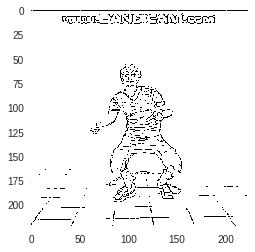

In [6]:
plt.imshow(shorter_list[4])

## Load, organize the data into sequences

In [0]:
#Load the data

train1=[]
train2=[]
train3=[]
train4=[]
train5=[]
train6=[]
train7=[]
train8=[]
train9=[]

train1=shorter_list[:-9]
train2=shorter_list[1:-8]
train3=shorter_list[2:-7]
train4=shorter_list[3:-6]
train5=shorter_list[4:-5]
train6=shorter_list[5:-4]
train7=shorter_list[6:-3]
train8=shorter_list[7:-2]
train9=shorter_list[8:-1]

y1=shorter_list[1:-8]
y2=shorter_list[2:-7]
y3=shorter_list[3:-6]
y4=shorter_list[4:-5]
y5=shorter_list[5:-4]
y6=shorter_list[6:-3]
y7=shorter_list[7:-2]
y8=shorter_list[8:-1]
y9=shorter_list[9:]       

In [0]:
def flat(list):
    count=0
    for arr in list:
        newarr=arr.reshape(50176)
        list[count]=newarr
        count+=1
flat(y1)
flat(y2)
flat(y3)
flat(y4)
flat(y5)
flat(y6)
flat(y7)
flat(y8)
flat(y9)
flat(train1)
flat(train2)
flat(train3)
flat(train4)
flat(train5)
flat(train6)
flat(train7)
flat(train8)
flat(train9)

## Create the model using Keras Functional API

In [9]:
# The model

# 1st input model
drop_out=0.2
dense_one=50
dense_two=50
dense_three=10
dense_four=10
pixels=50176

frame1 = Input(shape=(pixels,))
hidden1 = Dense(dense_one)(frame1)
hidden1 = BatchNormalization()(hidden1)
hidden1 = Activation('relu')(hidden1)
hidden1= Dropout(drop_out)(hidden1)
hidden1 = Dense(dense_two)(hidden1)
hidden1 = BatchNormalization()(hidden1)
hidden1 = Activation('relu')(hidden1)
hidden1= Dropout(drop_out)(hidden1)
hidden1 = Dense(dense_three)(hidden1)
hidden1 = BatchNormalization()(hidden1)
hidden1 = Activation('relu')(hidden1)
hidden1= Dropout(drop_out)(hidden1)
hidden1 = Dense(dense_four)(hidden1)
hidden1 = BatchNormalization()(hidden1)
hidden1 = Activation('relu')(hidden1)
hidden1= Dropout(drop_out)(hidden1)
output1 = Dense(pixels, activation='linear')(hidden1) #frame 2 is output 1

# 2nd input model
frame2 = Input(shape=(pixels,))
hidden2 = Dense(dense_one)(frame2)
hidden2 = BatchNormalization()(hidden2)
hidden2 = Activation('relu')(hidden2)
hidden2= Dropout(drop_out)(hidden2)
hidden2 = Dense(dense_two)(hidden2)
hidden2 = BatchNormalization()(hidden2)
hidden2 = Activation('relu')(hidden2)
hidden2= Dropout(drop_out)(hidden2)
hidden2 = Dense(dense_three)(hidden2)
hidden2 = BatchNormalization()(hidden2)
hidden2 = Activation('relu')(hidden2)
hidden2= Dropout(drop_out)(hidden2)
hidden2 = Dense(dense_four)(hidden2)
hidden2 = BatchNormalization()(hidden2)
hidden2 = Activation('relu')(hidden2)
hidden2= Dropout(drop_out)(hidden2)
output2 = Dense(pixels, activation='linear')(hidden2) #frame 3 is output 2

# 3rd input model
frame3 = Input(shape=(pixels,))
hidden3 = Dense(dense_one)(frame3)
hidden3 = BatchNormalization()(hidden3)
hidden3 = Activation('relu')(hidden3)
hidden3= Dropout(drop_out)(hidden3)
hidden3 = Dense(dense_two)(hidden3)
hidden3 = BatchNormalization()(hidden3)
hidden3 = Activation('relu')(hidden3)
hidden3= Dropout(drop_out)(hidden3)
hidden3 = Dense(dense_three)(hidden3)
hidden3 = BatchNormalization()(hidden3)
hidden3 = Activation('relu')(hidden3)
hidden3= Dropout(drop_out)(hidden3)
hidden3 = Dense(dense_four)(hidden3)
hidden3 = BatchNormalization()(hidden3)
hidden3 = Activation('relu')(hidden3)
hidden3= Dropout(drop_out)(hidden3)
output3 = Dense(pixels, activation='linear')(hidden3) #frame 4 is output 3

# 4th input model
frame4 = Input(shape=(pixels,))
hidden4 = Dense(dense_one)(frame3)
hidden4 = BatchNormalization()(hidden4)
hidden4 = Activation('relu')(hidden4)
hidden4= Dropout(drop_out)(hidden4)
hidden4 = Dense(dense_two)(hidden4)
hidden4 = BatchNormalization()(hidden4)
hidden4 = Activation('relu')(hidden4)
hidden4= Dropout(drop_out)(hidden4)
hidden4 = Dense(dense_three)(hidden4)
hidden4 = BatchNormalization()(hidden4)
hidden4 = Activation('relu')(hidden4)
hidden4= Dropout(drop_out)(hidden4)
hidden4 = Dense(dense_four)(hidden4)
hidden4 = BatchNormalization()(hidden4)
hidden4 = Activation('relu')(hidden4)
hidden4= Dropout(drop_out)(hidden4)
output4 = Dense(pixels, activation='linear')(hidden4) #frame 5 is output 4

# 5th input model
frame5 = Input(shape=(pixels,))
hidden5 = Dense(dense_one)(frame5)
hidden5 = BatchNormalization()(hidden5)
hidden5 = Activation('relu')(hidden5)
hidden5= Dropout(drop_out)(hidden5)
hidden5 = Dense(dense_two)(hidden5)
hidden5 = BatchNormalization()(hidden5)
hidden5 = Activation('relu')(hidden5)
hidden5= Dropout(drop_out)(hidden5)
hidden5 = Dense(dense_three)(hidden5)
hidden5 = BatchNormalization()(hidden5)
hidden5 = Activation('relu')(hidden5)
hidden5= Dropout(drop_out)(hidden5)
hidden5 = Dense(dense_four)(hidden5)
hidden5 = BatchNormalization()(hidden5)
hidden5 = Activation('relu')(hidden5)
hidden5= Dropout(drop_out)(hidden5)
output5 = Dense(pixels, activation='linear')(hidden5) #frame 6 is output 5

# 6th input model
frame6 = Input(shape=(pixels,))
hidden6 = Dense(dense_one)(frame6)
hidden6 = BatchNormalization()(hidden6)
hidden6 = Activation('relu')(hidden6)
hidden6= Dropout(drop_out)(hidden6)
hidden6 = Dense(dense_two)(hidden6)
hidden6 = BatchNormalization()(hidden6)
hidden6 = Activation('relu')(hidden6)
hidden6= Dropout(drop_out)(hidden6)
hidden6 = Dense(dense_three)(hidden6)
hidden6 = BatchNormalization()(hidden6)
hidden6 = Activation('relu')(hidden6)
hidden6= Dropout(drop_out)(hidden6)
hidden6 = Dense(dense_four)(hidden6)
hidden6 = BatchNormalization()(hidden6)
hidden6 = Activation('relu')(hidden6)
hidden6= Dropout(drop_out)(hidden6)
output6 = Dense(pixels, activation='linear')(hidden6) #frame 7 is output 6

# 7th input model
frame7 = Input(shape=(pixels,))
hidden7 = Dense(dense_one)(frame7)
hidden7 = BatchNormalization()(hidden7)
hidden7 = Activation('relu')(hidden7)
hidden7= Dropout(drop_out)(hidden7)
hidden7 = Dense(dense_two)(hidden7)
hidden7 = BatchNormalization()(hidden7)
hidden7 = Activation('relu')(hidden7)
hidden7= Dropout(drop_out)(hidden7)
hidden7 = Dense(dense_three)(hidden7)
hidden7 = BatchNormalization()(hidden7)
hidden7 = Activation('relu')(hidden7)
hidden7= Dropout(drop_out)(hidden7)
hidden7 = Dense(dense_four)(hidden7)
hidden7 = BatchNormalization()(hidden7)
hidden7 = Activation('relu')(hidden7)
hidden7= Dropout(drop_out)(hidden7)
output7 = Dense(pixels, activation='linear')(hidden7) #frame 8 is output 7

# 8th input model
frame8 = Input(shape=(pixels,))
hidden8 = Dense(dense_one)(frame8)
hidden1 = BatchNormalization()(hidden8)
hidden8 = Activation('relu')(hidden8)
hidden8= Dropout(drop_out)(hidden8)
hidden8 = Dense(dense_two)(hidden8)
hidden8 = BatchNormalization()(hidden8)
hidden8 = Activation('relu')(hidden8)
hidden8= Dropout(drop_out)(hidden8)
hidden8 = Dense(dense_three)(hidden8)
hidden8 = BatchNormalization()(hidden8)
hidden8 = Activation('relu')(hidden8)
hidden8= Dropout(drop_out)(hidden8)
hidden8 = Dense(dense_four)(hidden8)
hidden8 = BatchNormalization()(hidden8)
hidden8 = Activation('relu')(hidden8)
hidden8= Dropout(drop_out)(hidden8)
output8 = Dense(pixels, activation='linear')(hidden8) #frame 9 is output 8

# 9th input model
frame9 = Input(shape=(pixels,))
hidden9 = Dense(dense_one)(frame9)
hidden9 = BatchNormalization()(hidden9)
hidden9 = Activation('relu')(hidden9)
hidden9= Dropout(drop_out)(hidden9)
hidden9 = Dense(dense_two)(hidden9)
hidden9 = BatchNormalization()(hidden9)
hidden9 = Activation('relu')(hidden9)
hidden9= Dropout(drop_out)(hidden9)
hidden9 = Dense(dense_three)(hidden9)
hidden9 = BatchNormalization()(hidden9)
hidden9 = Activation('relu')(hidden9)
hidden9= Dropout(drop_out)(hidden9)
hidden9 = Dense(dense_four)(hidden9)
hidden9 = BatchNormalization()(hidden9)
hidden9 = Activation('relu')(hidden9)
hidden9= Dropout(drop_out)(hidden9)
output9 = Dense(pixels, activation='linear')(hidden9) #frame 10 is output 9

model = Model(inputs=[frame1, frame2, frame3,frame4, frame5, frame6,frame7, frame8, frame9],
              outputs=[output1, output2, output3,output4, output5, output6, output7,output8, output9])


#Compile the model
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

# summarize layers
print(model.summary())

# plot graph
plot_model(model, to_file='model.png')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50176)        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 50176)        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 50176)        0                                            
__________________________________________________________________________________________________
input_5 (InputLayer) 

In [0]:
from keras.callbacks import ReduceLROnPlateau

#Early Stop
earlystop = EarlyStopping(patience=10)

#Learning Rate Reduction
#We will reduce the learning rate when then accuracy not increase for 2 steps
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [0]:
#load weights
#model.load_weights('model_weights_swing.h5')
model.load_weights('model_weights.h5')

In [11]:
#Fit
history = model.fit(x=[train1,train2,train3,train4,train5,train6,train7,train8,train9],
          y=[y1,y2,y3,y4,y5,y6,y7,y8,y9], callbacks=callbacks,
          batch_size=10, epochs=80, verbose=1, validation_split=0.1, shuffle=False) 

Instructions for updating:
Use tf.cast instead.
Train on 891 samples, validate on 99 samples
Epoch 1/80
891/891 [==============================] - 35s 39ms/step - loss: 26545.9281 - dense_5_loss: 2949.7006 - dense_10_loss: 2949.6854 - dense_15_loss: 2949.5452 - dense_20_loss: 2949.5123 - dense_25_loss: 2949.6258 - dense_30_loss: 2949.6767 - dense_35_loss: 2949.5211 - dense_40_loss: 2949.3565 - dense_45_loss: 2949.3042 - dense_5_mean_squared_error: 2949.7006 - dense_10_mean_squared_error: 2949.6854 - dense_15_mean_squared_error: 2949.5452 - dense_20_mean_squared_error: 2949.5123 - dense_25_mean_squared_error: 2949.6258 - dense_30_mean_squared_error: 2949.6767 - dense_35_mean_squared_error: 2949.5211 - dense_40_mean_squared_error: 2949.3565 - dense_45_mean_squared_error: 2949.3042 - val_loss: 26560.6486 - val_dense_5_loss: 2949.6533 - val_dense_10_loss: 2948.5900 - val_dense_15_loss: 2951.5306 - val_dense_20_loss: 2952.6200 - val_dense_25_loss: 2951.4731 - val_dense_30_loss: 2950.6691 - 

In [0]:
# Save the weights
model.save_weights('model_weights_swing.h5')  

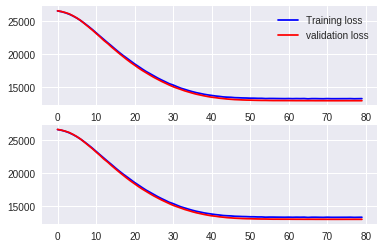

In [12]:
#Virtualize Training
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['loss'], color='b', label="Training loss")
ax[1].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[1])

## Prediction stage

In [0]:
#Predicting

#Need to use the same images in prediction and comparison. 

inputs_list=images_array[1:10]

flat(inputs_list)
inputs_list[0]=np.expand_dims(inputs_list[0],axis=0)
inputs_list[1]=np.expand_dims(inputs_list[1],axis=0)
inputs_list[2]=np.expand_dims(inputs_list[2],axis=0)
inputs_list[3]=np.expand_dims(inputs_list[3],axis=0)
inputs_list[4]=np.expand_dims(inputs_list[4],axis=0)
inputs_list[5]=np.expand_dims(inputs_list[5],axis=0)
inputs_list[6]=np.expand_dims(inputs_list[6],axis=0)
inputs_list[7]=np.expand_dims(inputs_list[7],axis=0)
inputs_list[8]=np.expand_dims(inputs_list[8],axis=0)

In [0]:
#getting the outputs
(output1,output2,output3,output4,output5,output6,output7,output8,output9)=model.predict([ inputs_list[0],inputs_list[1],inputs_list[2],inputs_list[3],inputs_list[4],inputs_list[5],inputs_list[6],inputs_list[7],inputs_list[8] ])

In [0]:
#Reshape images

#outputs
output1=np.reshape(output1,(224,224))
output2=np.reshape(output2,(224,224))
output3=np.reshape(output4,(224,224))
output4=np.reshape(output4,(224,224))
output5=np.reshape(output5,(224,224))
output6=np.reshape(output6,(224,224))
output7=np.reshape(output7,(224,224))
output8=np.reshape(output8,(224,224))
output9=np.reshape(output9,(224,224))

#inputs
inputs_list[0]=np.reshape(output1,(224,224))
inputs_list[1]=np.reshape(output2,(224,224))
inputs_list[2]=np.reshape(output4,(224,224))
inputs_list[3]=np.reshape(output4,(224,224))
inputs_list[4]=np.reshape(output5,(224,224))
inputs_list[5]=np.reshape(output6,(224,224))
inputs_list[6]=np.reshape(output7,(224,224))
inputs_list[7]=np.reshape(output8,(224,224))
inputs_list[8]=np.reshape(output9,(224,224))

In [17]:
output_images=np.array([output1,output2,output3,output4,output5,output6,output7,output8,output9])
output_images.shape

(9, 224, 224)

## Plotting the outputs

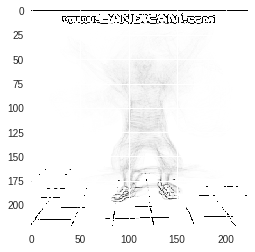

In [18]:
plt.imshow(output_images[1,:,:])

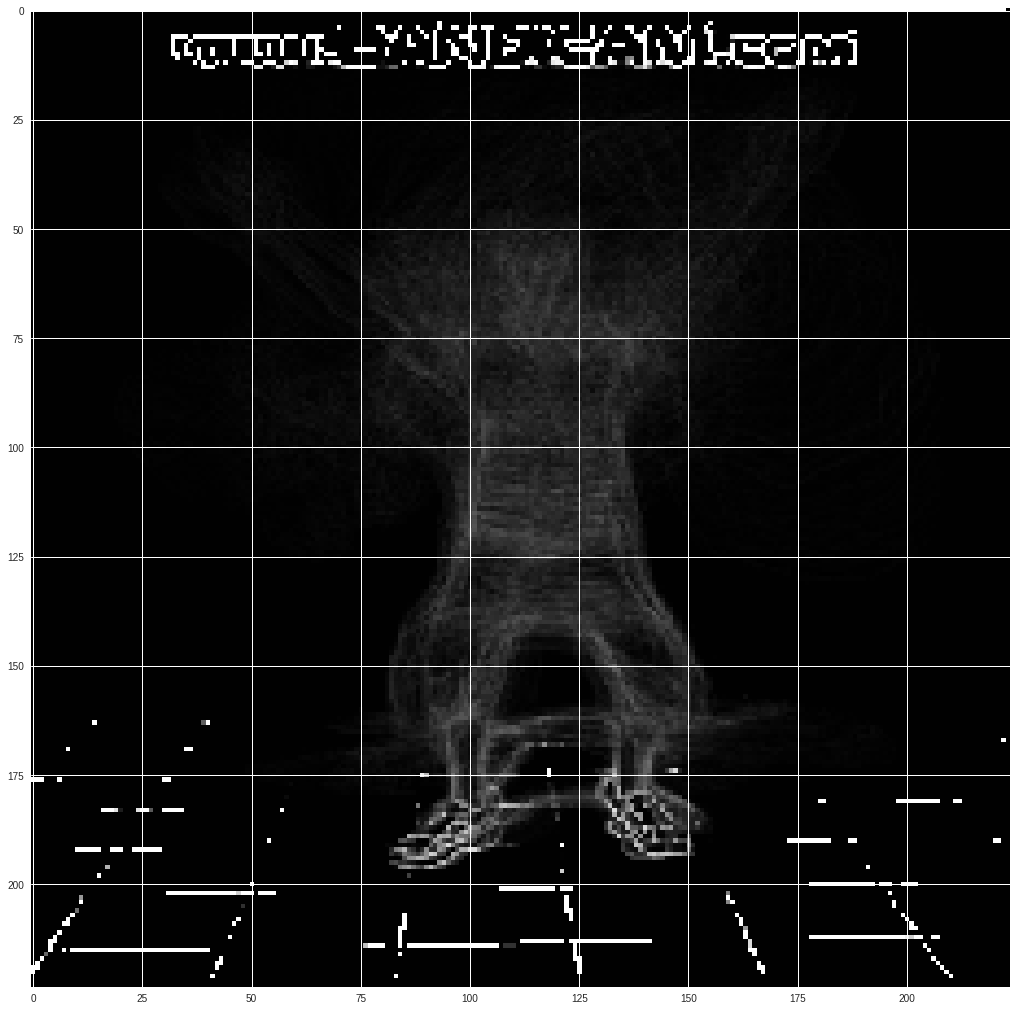

In [19]:
fig = plt.figure(figsize=(18, 18))
plt.imshow(output1,cmap='gray')

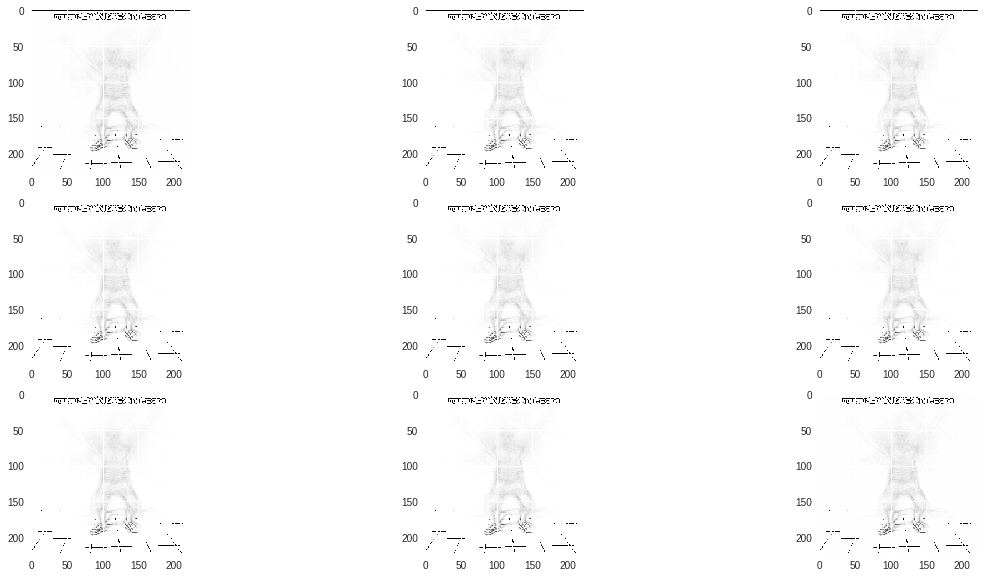

In [20]:
#Plotting the sequence of 9 outputs
fig = plt.figure(figsize=(20, 10))  # width, height in inches

for i in range(9):
    sub = fig.add_subplot(3, 3, i + 1)
    sub.imshow(output_images[i,:,:], interpolation='nearest')

## Compare Images

In [0]:
# import the necessary packages
from skimage.measure import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [0]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
 
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB) #-----------------------> The SSIM
 
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
 
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the images
	plt.show()

In [0]:
#changing the testing images type so they can be compared

output_images[0]=output_images[0].astype('float32')
output_images[1]=output_images[1].astype('float32')
output_images[2]=output_images[2].astype('float32')
output_images[3]=output_images[3].astype('float32')
output_images[4]=output_images[4].astype('float32')
output_images[5]=output_images[5].astype('float32')
output_images[6]=output_images[6].astype('float32')
output_images[7]=output_images[7].astype('float32')
output_images[8]=output_images[8].astype('float32')

#test_list=images_array[1:10] 
test_list=swim[1:10]

frame1=test_list[0].astype('float32')
frame2=test_list[1].astype('float32')
frame3=test_list[2].astype('float32')
frame4=test_list[3].astype('float32')
frame5=test_list[4].astype('float32')
frame6=test_list[5].astype('float32')
frame7=test_list[6].astype('float32')
frame8=test_list[7].astype('float32')
frame9=test_list[8].astype('float32')


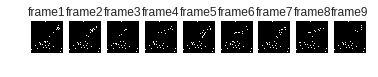

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


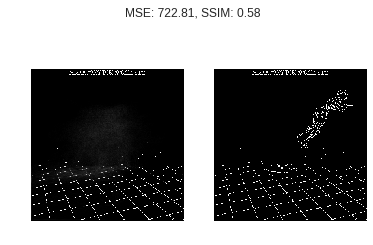

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


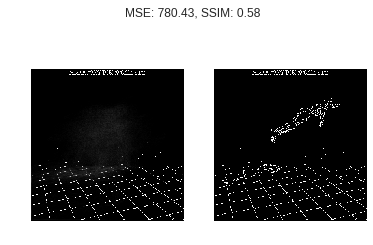

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


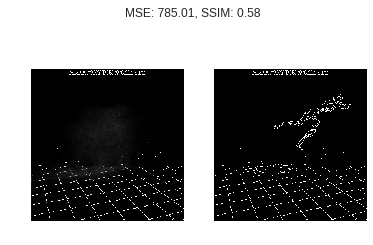

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


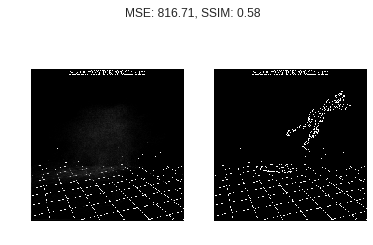

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


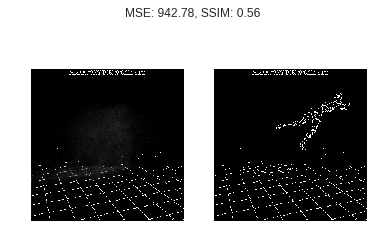

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


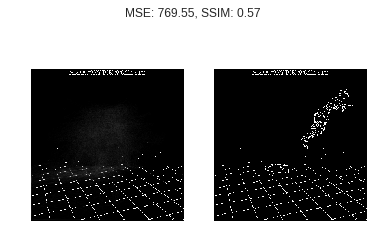

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


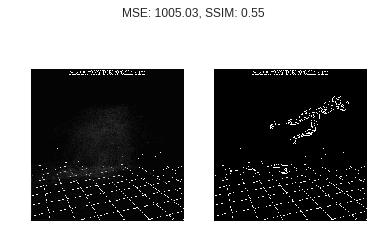

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


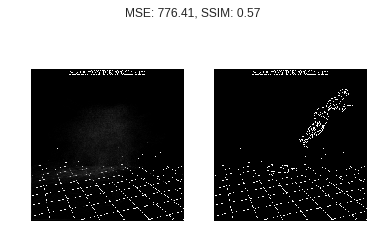

In [0]:
# initialize the figure
fig = plt.figure("Images")
images = ("frame1", frame1), ("frame2", frame2), ("frame3", frame3), ("frame4", frame4), ("frame5", frame5), ("frame6", frame6), ("frame7", frame7), ("frame8", frame8), ("frame9", frame9)

 
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 9, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
 
#show the figure
plt.show()
 
#WE NEED TO COMPARE OUTPUT 1 (a1) TO INPUT 2 (images_array2[1] or frame2), OUTPUT 2 (a2) TO INPUT 3 (images_array2[2] or frame3)...
''''''
# compare the images
compare_images(output_images[0], frame2, "output 1 vs input 2")
compare_images(output_images[1], frame3, "output 2 vs input 3")
compare_images(output_images[2], frame4, "output 3 vs input 4")
compare_images(output_images[3], frame5, "output 4 vs input 5")
compare_images(output_images[4], frame6, "output 5 vs input 6")
compare_images(output_images[5], frame7, "output 6 vs input 7")
compare_images(output_images[6], frame8, "output 7 vs input 8")
compare_images(output_images[7], frame9, "output 8 vs input 9")